# Blood Pressure Sensitivity to Diet and Genotype in Rats

This dataset from physionet.org contains heart rate and blood pressure captures for two different types of rats, under two different conditions. The two types of rats are the Dahl 'Salt Sensitive' rat and Brown Norway rat, and each were separated into two groups, with one receiving a higher level of NaCl in their diet prior to experiment. The data was sampled for 2 minutes at 100Hz. This analysis will explore the data and test for statistical differences in blood pressure as a result of the diet and genotype.

https://physionet.org/content/bpssrat/1.0.0/

# Import Libraries and Data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('/kaggle/input/ratsnacl/rats.csv')

# Exploratory Data Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Subject     360000 non-null  object 
 1   Group       360000 non-null  object 
 2   Time Point  360000 non-null  int64  
 3   Pressure    360000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.0+ MB


In [20]:
df.head()

,Subject,Group,Time Point,Pressure
0,SSLS_1,SSLS,1,115.440
1,SSLS_1,SSLS,2,114.402
2,SSLS_1,SSLS,3,112.708
3,SSLS_1,SSLS,4,110.862
4,SSLS_1,SSLS,5,109.000


In [21]:
print("# Subjects: ", df['Subject'].nunique())
print()
print(df['Subject'].unique())

# Subjects:  30

['SSLS_1' 'SSLS_2' 'SSLS_3' 'SSLS_4' 'SSLS_5' 'SSLS_6' 'SSLS_7' 'SSLS_8'
 'SSLS_9' 'SSHS_1' 'SSHS_2' 'SSHS_3' 'SSHS_4' 'SSHS_5' 'SSHS_6' 'SSHS_7'
 'SSHS_8' 'SSHS_9' 'BNLS_1' 'BNLS_2' 'BNLS_3' 'BNLS_4' 'BNLS_5' 'BNLS_6'
 'BNHS_1' 'BNHS_2' 'BNHS_3' 'BNHS_4' 'BNHS_5' 'BNHS_6']


In [22]:
class_counts = df.groupby('Subject').size()
print(class_counts.describe())

count       30.0
mean     12000.0
std          0.0
min      12000.0
25%      12000.0
50%      12000.0
75%      12000.0
max      12000.0
dtype: float64


In [23]:
ssls_1 = df[df['Subject'] == 'SSLS_1']
sshs_1 = df[df['Subject'] == 'SSHS_1']
bnls_1 = df[df['Subject'] == 'BNLS_1']
bnhs_1 = df[df['Subject'] == 'BNHS_1']

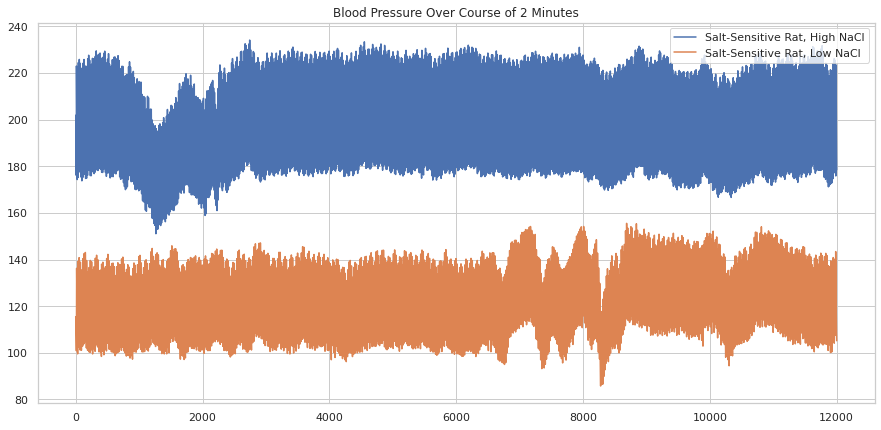

In [24]:
plt.figure(figsize=(15,7))
plt.plot(sshs_1['Time Point'], sshs_1['Pressure'], label='Salt-Sensitive Rat, High NaCl')
plt.plot(ssls_1['Time Point'], ssls_1['Pressure'], label='Salt-Sensitive Rat, Low NaCl')
plt.title('Blood Pressure Over Course of 2 Minutes')
plt.legend(loc='upper right')
plt.show()

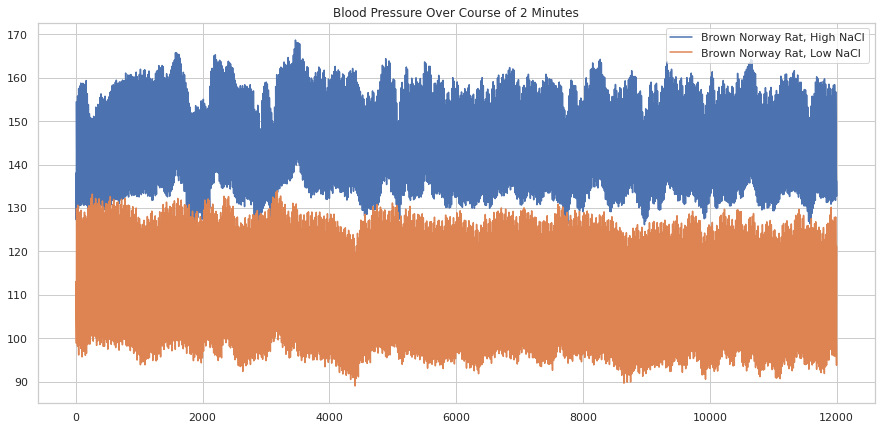

In [25]:
plt.figure(figsize=(15,7))
plt.plot(bnhs_1['Time Point'], bnhs_1['Pressure'], label='Brown Norway Rat, High NaCl')
plt.plot(bnls_1['Time Point'], bnls_1['Pressure'], label='Brown Norway Rat, Low NaCl')
plt.title('Blood Pressure Over Course of 2 Minutes')
plt.legend(loc='upper right')
plt.show()

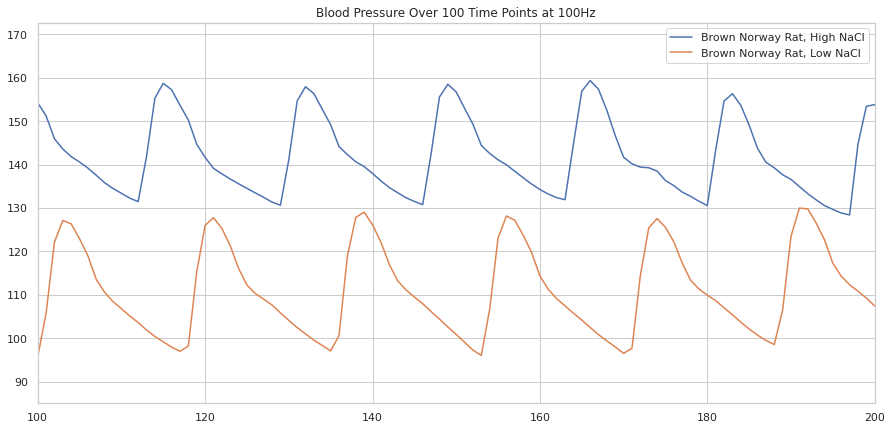

In [26]:
plt.figure(figsize=(15,7))
plt.plot(bnhs_1['Time Point'], bnhs_1['Pressure'], label='Brown Norway Rat, High NaCl')
plt.plot(bnls_1['Time Point'], bnls_1['Pressure'], label='Brown Norway Rat, Low NaCl')
plt.title('Blood Pressure Over 100 Time Points at 100Hz')
plt.legend(loc='upper right')
plt.xlim([100,200])
plt.show()

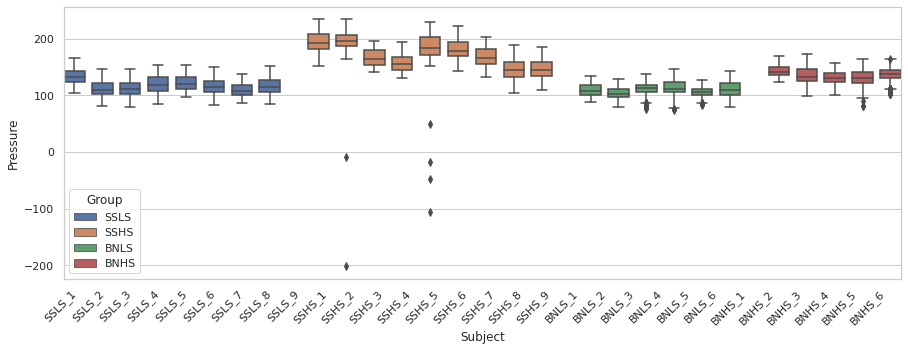

In [27]:
plt.figure(figsize=(15, 5))
chart = sns.boxplot(x=df['Subject'], y=df['Pressure'], hue=df['Group'], width=3)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Outlier Removal

In [28]:
df_copy = pd.read_csv('/kaggle/input/ratsnacl/rats.csv')

subjects = df['Subject'].unique()

for i in range(len(subjects)):
    subj = subjects[i]
    data = df[df['Subject'] == subj]
    
    med = np.median(data['Pressure'])
    std = np.std(data['Pressure'])
    
    st_idx = np.min(data.index)
    end_idx = np.max(data.index)
    
    for j in range(st_idx, end_idx):
        if data['Pressure'].loc[j] > (med + std*4) or data['Pressure'].loc[j] < (med - std*4):
            df_copy['Pressure'].loc[j] = med
            print(subj, int(data['Pressure'].loc[j]), int(med), int(std))

SSHS_2 -201 195 13
SSHS_2 -9 195 13
SSHS_5 -16 183 17
SSHS_5 -105 183 17
SSHS_5 -47 183 17
SSHS_5 48 183 17
BNLS_3 76 112 9


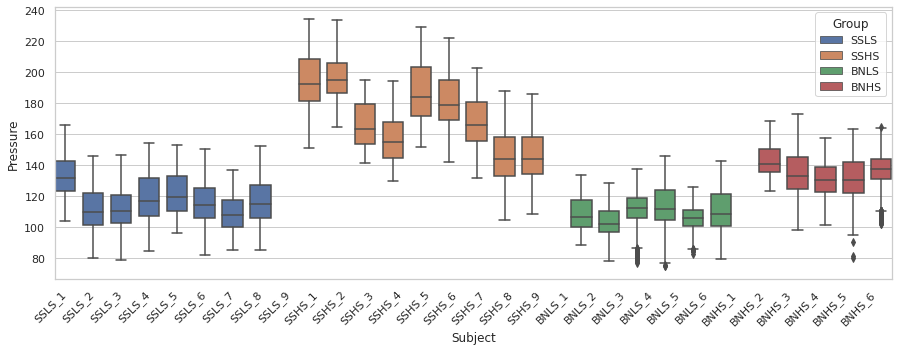

In [29]:
plt.figure(figsize=(15, 5))
chart = sns.boxplot(x=df_copy['Subject'], y=df_copy['Pressure'], hue=df_copy['Group'], width=3)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [30]:
ss_df = df_copy[df_copy['Group'].isin(['SSHS', 'SSLS'])]
bn_df = df_copy[df_copy['Group'].isin(['BNHS', 'BNLS'])]

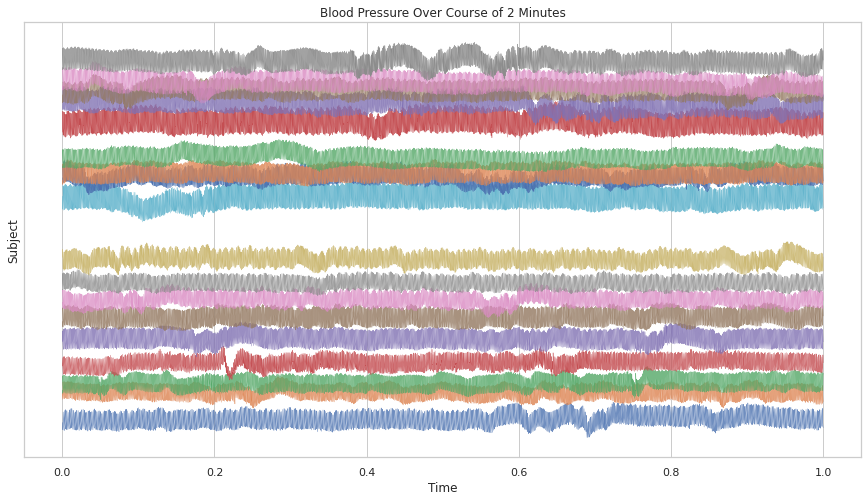

In [31]:
subjects = ss_df['Subject'].unique()
timepts = np.linspace(0,1,12000)

fig = plt.figure(figsize=(15,8))
for i in range(len(subjects)):
    subj = subjects[i]
    data = ss_df[ss_df['Subject'] == subj]
    plt.plot(timepts,data['Pressure']+i*40,linewidth=0.4)
plt.title('Blood Pressure Over Course of 2 Minutes')
plt.xlabel('Time')
plt.ylabel('Subject')
plt.yticks([])
plt.show()

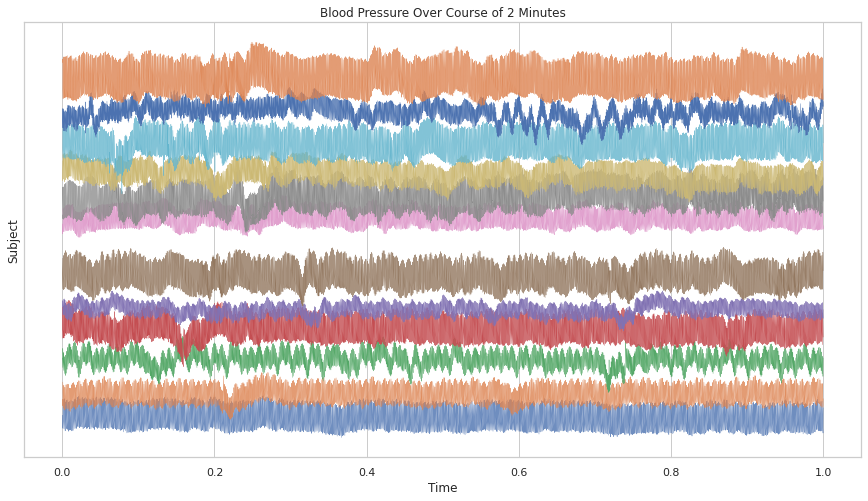

In [32]:
subjects = bn_df['Subject'].unique()
timepts = np.linspace(0,1,12000)

fig = plt.figure(figsize=(15,8))
for i in range(len(subjects)):
    subj = subjects[i]
    data = bn_df[bn_df['Subject'] == subj]
    plt.plot(timepts,data['Pressure']+i*30,linewidth=0.4)
plt.title('Blood Pressure Over Course of 2 Minutes')
plt.xlabel('Time')
plt.ylabel('Subject')
plt.yticks([])
plt.show()

# Analyzing Average Amplitude

In [33]:
crosstab = df_copy.pivot_table(values = "Pressure", columns = "Subject", index = "Time Point")
print(np.shape(crosstab))
crosstab.head()

(12000, 30)


Subject,BNHS_1,BNHS_2,BNHS_3,BNHS_4,BNHS_5,BNHS_6,BNLS_1,BNLS_2,BNLS_3,BNLS_4,...,SSHS_9,SSLS_1,SSLS_2,SSLS_3,SSLS_4,SSLS_5,SSLS_6,SSLS_7,SSLS_8,SSLS_9
Time Point,,,,,,,,,,,,,,,,,,,,,
1,138.009,117.790,145.837,152.277,120.918,160.822,112.968,100.012,114.448,105.582,...,136.132,115.440,133.629,99.097,106.757,115.119,114.829,113.013,98.166,121.147
2,137.231,115.882,142.205,147.531,129.998,164.790,110.831,98.288,112.556,105.460,...,133.538,114.402,131.386,96.991,120.338,131.127,112.510,110.374,97.006,134.316
3,136.178,113.517,139.275,140.084,138.848,161.249,109.351,96.792,110.419,122.703,...,131.447,112.708,129.097,95.190,123.451,136.361,110.053,108.161,106.940,137.154
4,134.743,115.470,136.956,135.903,141.717,154.932,108.115,95.312,108.085,135.354,...,147.974,110.862,126.778,93.618,120.659,136.132,107.856,106.147,124.687,133.904
5,132.210,138.329,134.560,134.240,140.435,145.089,106.696,93.985,105.902,138.924,...,167.231,109.000,124.580,92.810,115.898,133.721,105.826,104.392,129.799,129.311


In [34]:
from scipy.signal import find_peaks

results_df = pd.DataFrame(data=np.zeros(shape=(len(crosstab.columns),4)))

for i in range(len(crosstab.columns)):
    col = crosstab.columns[i]
    peaks, results = find_peaks(crosstab[col], height=0)
    results_df.iloc[i,0] = col
    results_df.iloc[i,1] = pd.Series(results['peak_heights']).count()
    results_df.iloc[i,2] = results['peak_heights'].mean()
    results_df.iloc[i,3] = col[0:3]

In [35]:
results_df = results_df.rename(columns={0:'Subject', 1:'Count', 2:'Mean', 3:'Group'})

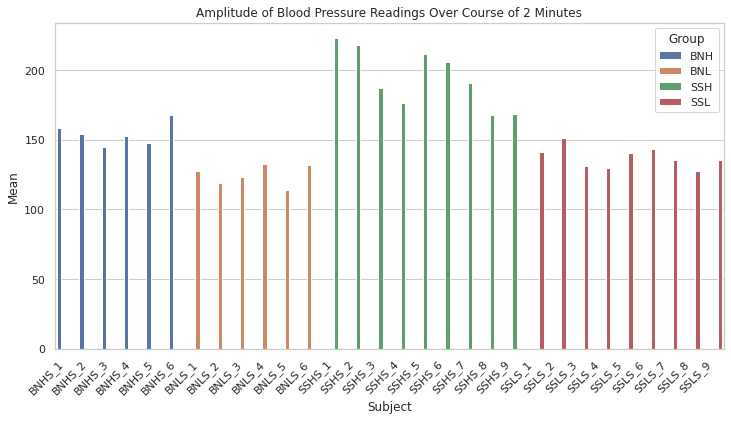

In [36]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=results_df['Subject'], y=results_df['Mean'], hue=results_df['Group'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Amplitude of Blood Pressure Readings Over Course of 2 Minutes')
plt.show()

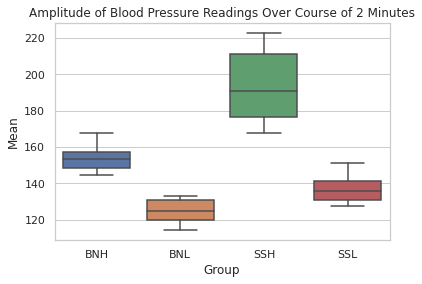

In [37]:
plt.figure(figsize=(6,4))
plt.title('Amplitude of Blood Pressure Readings Over Course of 2 Minutes')
chart = sns.boxplot(x=results_df['Group'], y=results_df['Mean'], )

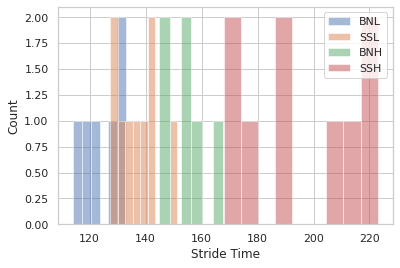

In [38]:
plt.figure(figsize=(6,4))

bnh = results_df[results_df['Group']=='BNH']
bnl = results_df[results_df['Group']=='BNL']
ssh = results_df[results_df['Group']=='SSH']
ssl = results_df[results_df['Group']=='SSL']

plt.hist(bnl['Mean'],bins=6,alpha=0.5,label='BNL')
plt.hist(ssl['Mean'],bins=9,alpha=0.5,label='SSL')
plt.hist(bnh['Mean'],bins=6,alpha=0.5,label='BNH')
plt.hist(ssh['Mean'],bins=9,alpha=0.5,label='SSH')

plt.xlabel('Stride Time')
plt.ylabel('Count')
plt.legend()
plt.show()

# T-Tests

In [39]:
import scipy.stats as stats

n1 = len(bnh)
n2 = len(bnl)
t,p = stats.ttest_ind(bnh['Mean'],bnl['Mean'],equal_var=False)
ddof = n1+n2-2
print('Brown Norway Rat: High NaCl vs. Low NaCl')
print('t(%g) = %g, p=%g'%(ddof,t,p))

Brown Norway Rat: High NaCl vs. Low NaCl
t(10) = 6.51097, p=7.16103e-05


In [40]:
n1 = len(ssh)
n2 = len(ssl)
t,p = stats.ttest_ind(ssh['Mean'],ssl['Mean'],equal_var=False)
ddof = n1+n2-2
print('Salt Sensitive Dahl Rat: High NaCl vs. Low NaCl')
print('t(%g) = %g, p=%g'%(ddof,t,p))

Salt Sensitive Dahl Rat: High NaCl vs. Low NaCl
t(16) = 7.65387, p=1.69607e-05


# ANOVA

In [42]:
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.1/183.1 KB 4.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=397037d18b0d68348ce20816e844ed44c6c1c331af2403025f16c5c45b13cdf3
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=05a9d83cee30b6cac780210256bd515139e3cae55960bed14d3f92bfd764bd52
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [43]:
pg.anova(data=df_copy,dv='Pressure',between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,3,359996,256103.356371,0.0,0.680941


In [44]:
pg.pairwise_tukey(data=df_copy,dv='Pressure',between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,BNHS,BNLS,136.914108,109.463596,27.450512,0.089814,305.638348,0.0,1.610847
1,BNHS,SSHS,136.914108,171.529654,-34.615547,0.081988,-422.200959,0.0,-2.031307
2,BNHS,SSLS,136.914108,117.737985,19.176123,0.081988,233.888477,0.0,1.125292
3,BNLS,SSHS,109.463596,171.529654,-62.066058,0.081988,-757.010994,0.0,-3.642156
4,BNLS,SSLS,109.463596,117.737985,-8.274389,0.081988,-100.921558,0.0,-0.485557
5,SSHS,SSLS,171.529654,117.737985,53.791670,0.073333,733.530290,0.0,3.156601
